In [3]:
#Imports
%matplotlib widget
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from Imports import edge_detection, hough_transform
from fractions import Fraction
import joblib

Images/rest2/coins1.jpg


C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfeats\multiscale\fdta.py:16: RuntimeWarning: divide by zero encountered in log10
  return np.polyfit(np.log10(np.arange(1,k+1)), np.log10(id), deg=1)[0]
C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfeats\multiscale\fdta.py:57: RuntimeWarning: overflow encountered in ubyte_scalars
  res_mask[i,j]=(mask[(2*i),(2*j)]+mask[(2*i+1),(2*j)]+mask[(2*i),(2*j+1)]+mask[(2*i+1),(2*j+1)])/4
C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfeats\multiscale\fdta.py:16: RuntimeWarning: divide by zero encountered in log10
  return np.polyfit(np.log10(np.arange(1,k+1)), np.log10(id), deg=1)[0]
C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0

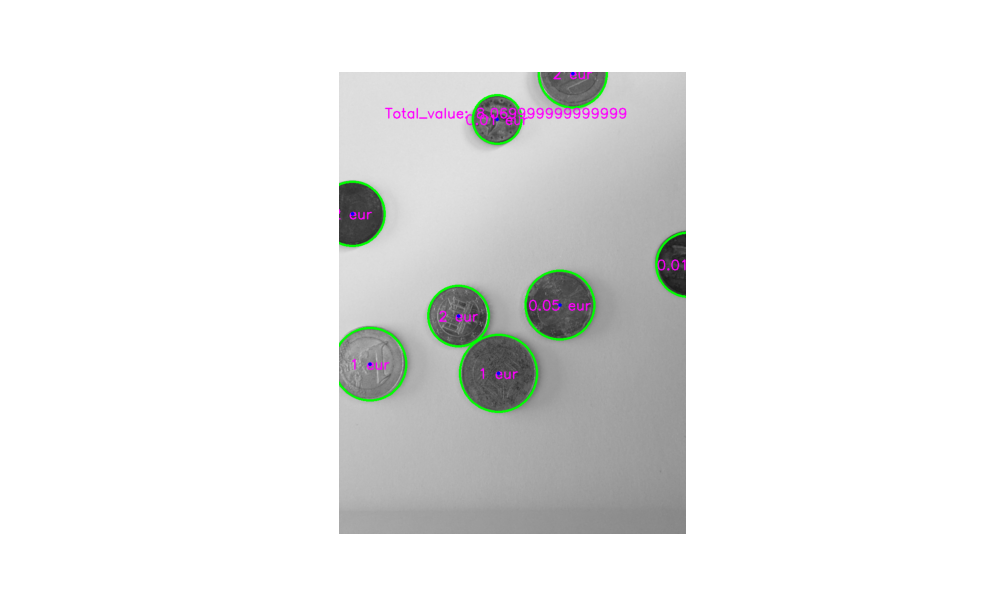

Images/rest2/coins2.jpg


C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfeats\multiscale\fdta.py:16: RuntimeWarning: divide by zero encountered in log10
  return np.polyfit(np.log10(np.arange(1,k+1)), np.log10(id), deg=1)[0]
C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfeats\multiscale\fdta.py:57: RuntimeWarning: overflow encountered in ubyte_scalars
  res_mask[i,j]=(mask[(2*i),(2*j)]+mask[(2*i+1),(2*j)]+mask[(2*i),(2*j+1)]+mask[(2*i+1),(2*j+1)])/4
C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfeats\multiscale\fdta.py:16: RuntimeWarning: divide by zero encountered in log10
  return np.polyfit(np.log10(np.arange(1,k+1)), np.log10(id), deg=1)[0]
C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0

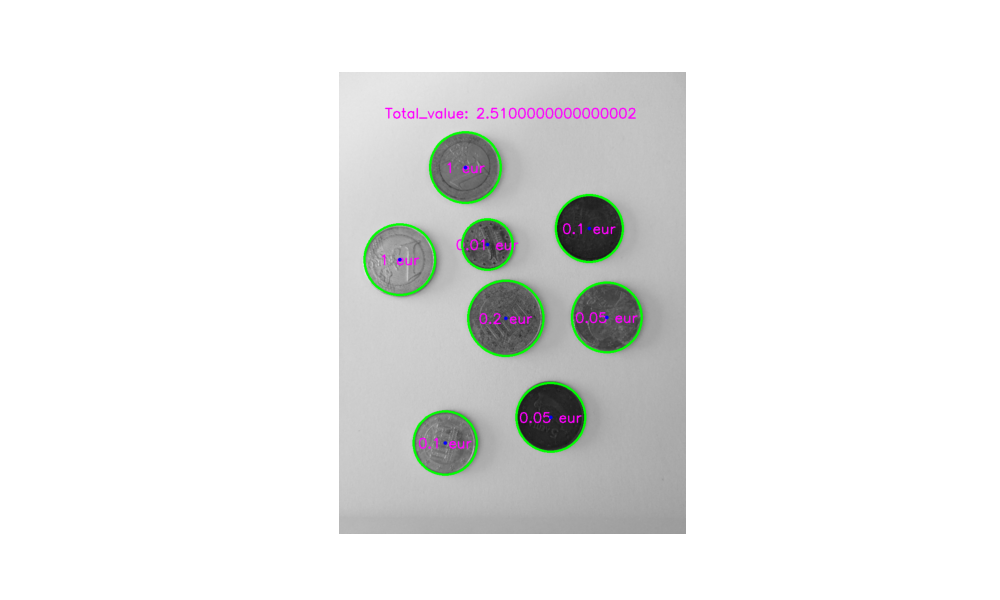

Images/rest2/coins3.jpg


c:\Users\jason\OneDrive\Υπολογιστής\CSD\Computer Vision\Assignment-03\Imports\edge_detection.py:70: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(dX / dY)
C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfeats\multiscale\fdta.py:16: RuntimeWarning: divide by zero encountered in log10
  return np.polyfit(np.log10(np.arange(1,k+1)), np.log10(id), deg=1)[0]
C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfeats\multiscale\fdta.py:57: RuntimeWarning: overflow encountered in ubyte_scalars
  res_mask[i,j]=(mask[(2*i),(2*j)]+mask[(2*i+1),(2*j)]+mask[(2*i),(2*j+1)]+mask[(2*i+1),(2*j+1)])/4
C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfeats\multiscale\fdta.py:16: RuntimeWarning: divide by zero

In [19]:
# Time to create features

import seaborn as sns
import random
import pyfeats

# Load model
loaded_pipeline = joblib.load('Models/svc.pkl')

# Load a seaborn color palette
palette = sns.color_palette("bright")  # 'bright' is one of the many available palettes

# Dictionary of classes
val_dict = {0:0.01, 1:0.02, 2:0.05, 3:0.1, 4:0.2, 5:0.5, 6:1, 7:2}

# Load the image
#fig, axs_out = plt.subplots(13, 1, figsize=(10, 25))
for n_coin in range(1, 21):
    coin = "rest2"
    tot_val = 0
    path = ('Images/'+coin+'/coins{}.jpg').format(n_coin)
    image = cv.imread(path)
    print(path)

    # Detect circles
    out_final, magn, angle, edge_pixels, im_gray, im = hough_transform.preprocess_image(path, sf=0.25, gaussian_kernel=3, thresh1=20, thresh2=85, canny_kernel=3)
    fine_tuned_circles, circles, hough_tensor, candidate_pixels = hough_transform.hough_transform_circles(out_final, edge_pixels, angle, 10, 200, im_gray.shape[0], im_gray.shape[1], 0.25, 0.1)
    cimg = cv.cvtColor(im_gray, cv.COLOR_GRAY2BGR)

    # Convert from RGB to HSV
    hsv_image = cv.cvtColor(im, cv.COLOR_BGR2HSV)
    hue_channel = (hsv_image[:, :, 0] - np.mean(hsv_image[:, :, 0])) / np.max(hsv_image[:, :, 0]) * 255
    sat_channel = (hsv_image[:, :, 1] - np.mean(hsv_image[:, :, 1])) / np.max(hsv_image[:, :, 1]) * 255
    val_channel = (hsv_image[:, :, 2] - np.mean(hsv_image[:, :, 2])) / np.max(hsv_image[:, :, 2]) * 255
    b_channel = (im[:, :, 0] - np.mean(im[:, :, 0])) / np.max(im[:, :, 0]) * 255
    g_channel = (im[:, :, 1] - np.mean(im[:, :, 1])) / np.max(im[:, :, 1]) * 255
    r_channel = (im[:, :, 2] - np.mean(im[:, :, 2])) / np.max(im[:, :, 2]) * 255
    magn = (magn - np.mean(magn)) / np.max(magn) * 255
    angle = (angle - np.mean(angle)) / np.max(angle) * 255
    im_gray = (im_gray - np.mean(im_gray)) / np.max(im_gray) * 255
    im_gray = im_gray.astype(np.uint8)
    int_magn = magn.astype(np.uint8)
    int_angle = angle.astype(np.uint8)
    int_hue_channel = hue_channel.astype(np.uint8)
    int_sat_channel = sat_channel.astype(np.uint8)
    int_val_channel = val_channel.astype(np.uint8)
    int_b_channel = b_channel.astype(np.uint8)
    int_g_channel = g_channel.astype(np.uint8)
    int_r_channel = r_channel.astype(np.uint8)

    for c in fine_tuned_circles:

        # Text settings
        text = str().format(c[2])
        font = cv.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        font_color = (255, 0, 255)  # White text
        thickness = 2

        # Calculate text size
        (text_width, text_height), _ = cv.getTextSize(text, font, font_scale, thickness)

        # Calculate text position so that it is centered
        text_x = round(c[1]) - text_width // 2
        text_y = round(c[0]) + text_height // 2

        # Put the text
        cv.putText(cimg, text, (text_x, text_y), font, font_scale, font_color, thickness)
        cv.circle(cimg, (round(c[1]), round(c[0])), round(c[2]), (0, 255, 0), 3)
        cv.circle(cimg, (round(c[1]), round(c[0])), 1, (0, 0, 255), 5)

        # Creat a circular mask
        # Create a black image of the same size as the original image
        mask = np.zeros_like(hue_channel, dtype=np.uint8)

        # Create a white circle at (x, y) with radius r
        cv.circle(mask, (c[1], c[0]), c[2], (255), thickness=-1)  # -1 fills the circle

        # Apply the mask to the hue channel
        masked_hue = cv.bitwise_and(int_hue_channel, int_hue_channel, mask=mask)
        masked_sat = cv.bitwise_and(int_sat_channel, int_sat_channel, mask=mask)
        masked_val = cv.bitwise_and(int_val_channel, int_val_channel, mask=mask)
        masked_b= cv.bitwise_and(int_b_channel, int_b_channel, mask=mask)
        masked_g = cv.bitwise_and(int_g_channel, int_g_channel, mask=mask)
        masked_r = cv.bitwise_and(int_r_channel, int_r_channel, mask=mask)
        masked_magn = cv.bitwise_and(int_magn, int_magn, mask=mask) 
        masked_ang = cv.bitwise_and(int_angle, int_angle, mask=mask) 
        magn_hist, _ = np.histogram(masked_magn, bins=25, range=(np.min(masked_magn) + 1, np.max(masked_magn)), density=True, weights=None)
        ang_hist, _ = np.histogram(masked_ang, bins=25, range=(np.min(masked_ang) + 1, np.max(masked_ang) - 1), density=True, weights=None)

        features1, labels = pyfeats.fos(im_gray, mask)
        features2, labels = pyfeats.histogram(im_gray, mask, bins=32)
        features4, labels = pyfeats.glds_features(im_gray, mask, Dx=[0,1,1,1], Dy=[1,1,0,-1])
        features3, labels = pyfeats.sfm_features(im_gray, mask, Lr=4, Lc=4)
        features5, labels = pyfeats.fdta(im_gray, mask, s=3)

        # Calculate moments
        hue_moments = cv.moments(masked_hue.astype(np.float32))
        sat_moments = cv.moments(masked_sat.astype(np.float32))
        val_moments = cv.moments(masked_val.astype(np.float32))
        b_moments = cv.moments(masked_b.astype(np.float32))
        g_moments = cv.moments(masked_g.astype(np.float32))
        r_moments = cv.moments(masked_r.astype(np.float32))
        features = list(features1) + list(features2) + list(features3) + list(features4) + list(features5) + list(hue_moments.values()) + list(sat_moments.values()) + list(val_moments.values()) + list(b_moments.values()) + list(g_moments.values()) + list(r_moments.values()) + list(magn_hist) + list(ang_hist)
        features.append(c[2])
        ypred = loaded_pipeline.predict(np.array(features).reshape(1, -1))
        # Text settings
        text = str(val_dict[int(ypred)]) + " eur"
        font = cv.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        font_color = (255, 0, 255)  # White text
        thickness = 2

        # Calculate text size
        (text_width, text_height), _ = cv.getTextSize(text, font, font_scale, thickness)

        # Calculate text position so that it is centered
        text_x = round(c[1]) - text_width // 2
        text_y = round(c[0]) + text_height // 2

        # Put the text
        cv.putText(cimg, text, (text_x, text_y), font, font_scale, font_color, thickness)
        cv.circle(cimg, (round(c[1]), round(c[0])), round(c[2]), (0, 255, 0), 3)
        cv.circle(cimg, (round(c[1]), round(c[0])), 1, (0, 0, 255), 5)

        # Creat a circular mask
        # Create a black image of the same size as the original image
        mask = np.zeros_like(hue_channel, dtype=np.uint8)

        # Create a white circle at (x, y) with radius r
        cv.circle(mask, (c[1], c[0]), c[2], (255), thickness=-1)  # -1 fills the circle
        tot_val += val_dict[int(ypred)]

    # Text settings
    text = "Total_value: {}".format(tot_val)
    font = cv.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_color = (255, 0, 255)  # White text
    thickness = 2

    # Calculate text size
    (text_width, text_height), _ = cv.getTextSize(text, font, font_scale, thickness)

    # Calculate text position so that it is centered
    text_x = 100
    text_y = 100

    # Put the text
    cv.putText(cimg, text, (text_x, text_y), font, font_scale, font_color, thickness)

    fig, axs = plt.subplots(1, 1, figsize=(10, 6))
    axs.set_axis_off()
    axs.imshow(cimg)
    fig.savefig("Output_Images/output_others{}.png".format(n_coin))
    plt.show()
